# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

#### 2.1 Exploring the dataset


In [59]:
# Checkpoint df load
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

In [60]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import numpy as np

In [61]:
# Prints summary of all data in columns
for column in df.columns:
    column_summary = df[column].describe()
    print(f"Summary statistics for column '{column}':")
    print(column_summary)
    print("\n")

Summary statistics for column 'num_passengers':
count    50000.000000
mean         1.591240
std          1.020165
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: num_passengers, dtype: float64


Summary statistics for column 'sales_channel':
count        50000
unique           2
top       Internet
freq         44382
Name: sales_channel, dtype: object


Summary statistics for column 'trip_type':
count         50000
unique            3
top       RoundTrip
freq          49497
Name: trip_type, dtype: object


Summary statistics for column 'purchase_lead':
count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64


Summary statistics for column 'length_of_stay':
count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%    

##### Conclusions Drawn
- Customer booked for maximum 9 people and minimum 1 person. The mean is 2 people (rounded up)
- Most people booked using the internet
- The most popular trip type is a round trip
- 

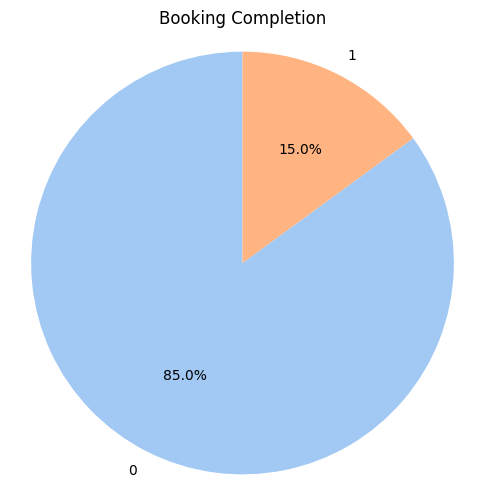

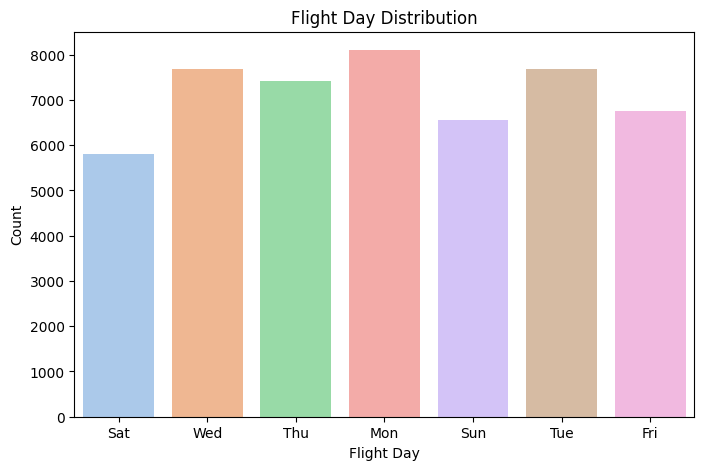

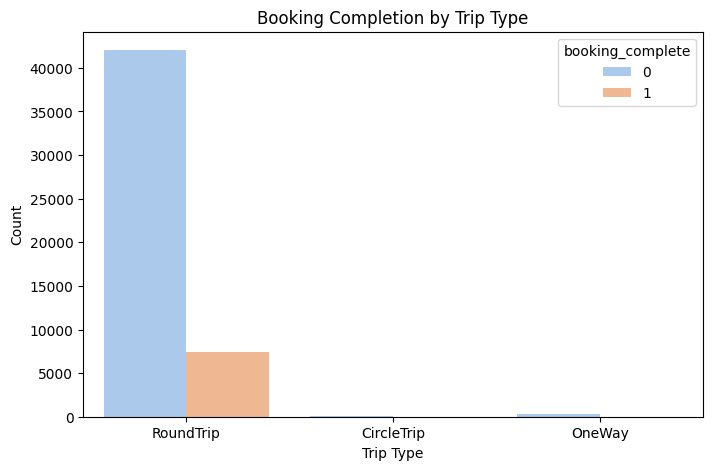

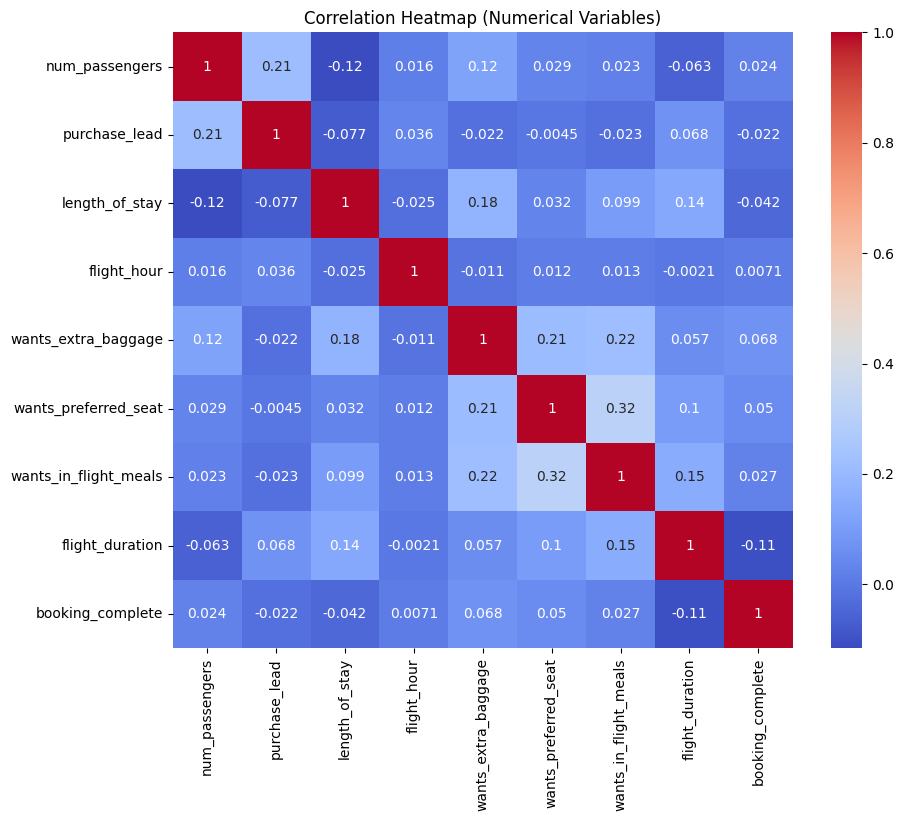

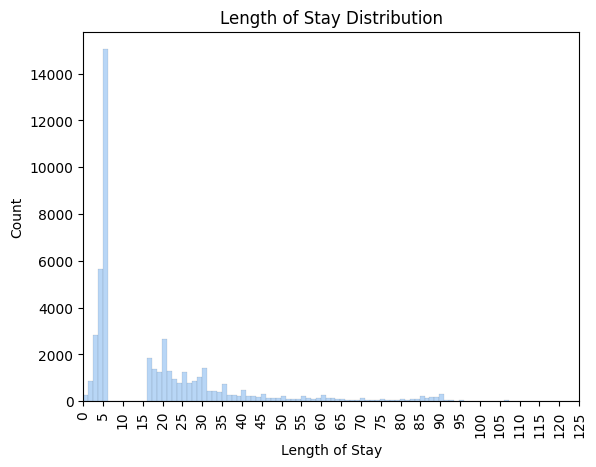

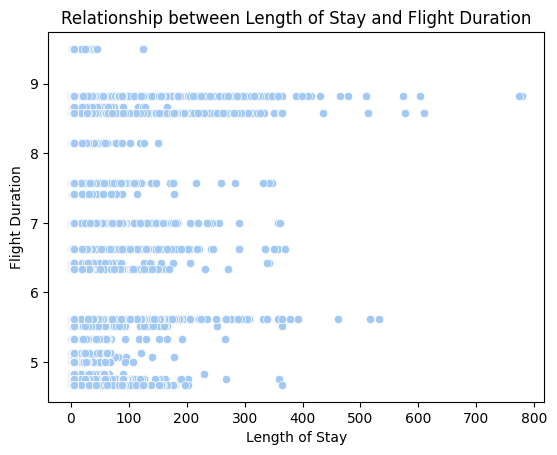

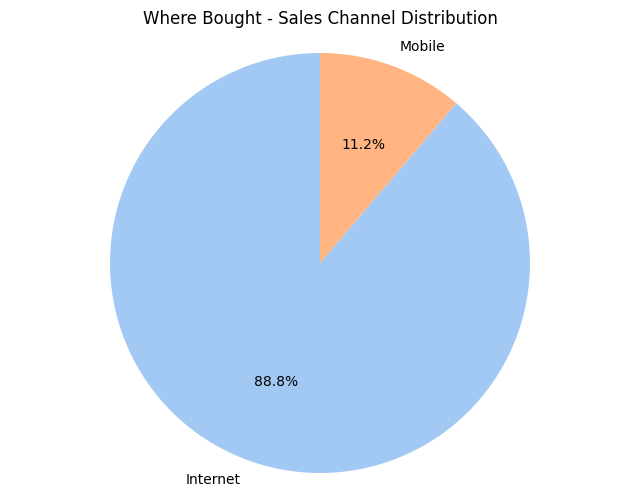

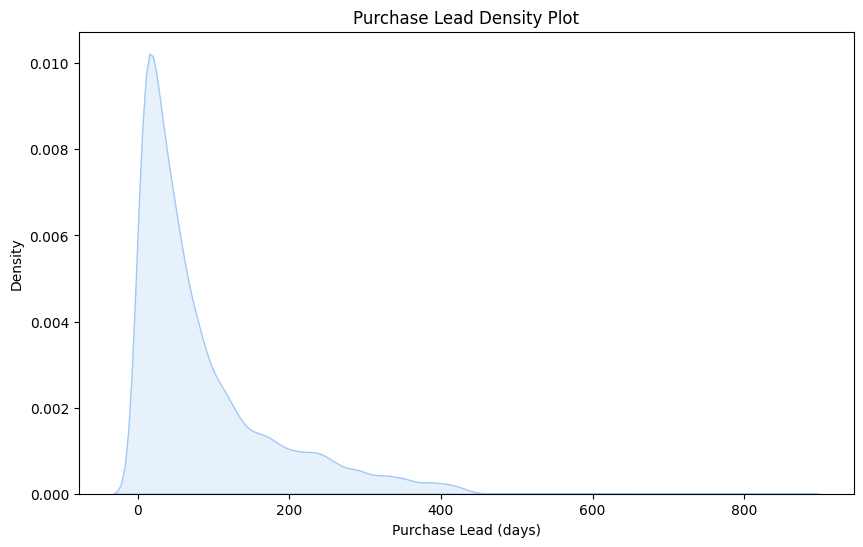

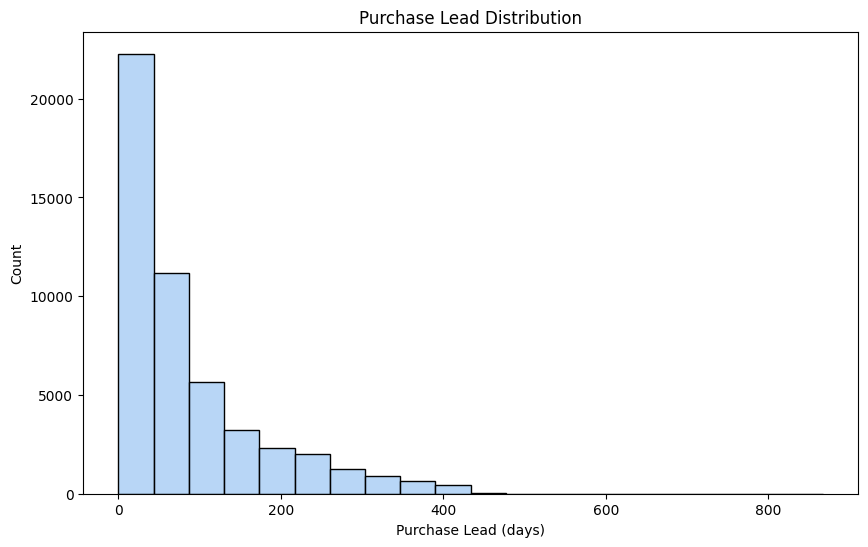

In [62]:
sns.set_palette("pastel")

def bookingComplete():
    booking_complete_counts = df['booking_complete'].value_counts()
    plt.figure(figsize=(6, 6)) 
    plt.pie(booking_complete_counts, labels=booking_complete_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Booking Completion")
    plt.show()

def flightDayDist():
    plt.figure(figsize=(8, 5))
    sns.countplot(x='flight_day', data=df)
    plt.title('Flight Day Distribution')
    plt.xlabel('Flight Day')
    plt.ylabel('Count')
    plt.show()

def tripType():
    plt.figure(figsize=(8, 5))
    sns.countplot(x='trip_type', hue='booking_complete', data=df)
    plt.title('Booking Completion by Trip Type')
    plt.xlabel('Trip Type')
    plt.ylabel('Count')
    plt.show()

def corrHeatmap():
    plt.figure(figsize=(10, 8))
    numerical_columns = df.select_dtypes(include='number')
    correlation_matrix = numerical_columns.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Numerical Variables)')
    plt.show()

def los():
    sns.histplot(data=df, x="length_of_stay")
    plt.xticks(rotation=90)
    tick_interval = 5
    tick_positions = range(0, 130, tick_interval)
    plt.gca().xaxis.set_major_locator(tick.MultipleLocator(tick_interval))
    plt.gca().set_xticks(tick_positions)
    plt.xlim(0, 125)
    plt.title('Length of Stay Distribution')
    plt.xlabel('Length of Stay')
    plt.ylabel('Count')
    plt.show()

def losFlightLength():
    sns.scatterplot(data=df, x="length_of_stay", y="flight_duration")
    plt.title('Relationship between Length of Stay and Flight Duration')
    plt.xlabel('Length of Stay')
    plt.ylabel('Flight Duration')
    plt.show()

def salesChannelDistribution():
    sales_channel_counts = df['sales_channel'].value_counts()
    plt.figure(figsize=(8, 6)) 
    plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Where Bought - Sales Channel Distribution")
    plt.show()
    
def purchaseLeadHistogram():
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x="purchase_lead", bins=20, kde=False)
    plt.title('Purchase Lead Distribution')
    plt.xlabel('Purchase Lead (days)')
    plt.ylabel('Count')
    plt.show()
    
def purchaseLeadDensity():
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x="purchase_lead", fill=True)
    plt.title('Purchase Lead Density Plot')
    plt.xlabel('Purchase Lead (days)')
    plt.ylabel('Density')
    plt.show()
    
bookingComplete()
flightDayDist()
tripType()
corrHeatmap()
los()
losFlightLength()
salesChannelDistribution()
purchaseLeadDensity()
purchaseLeadHistogram() 

### 2.2 Training a machine learning model

#### 2.2.1 Preprocessing of data

In [63]:
# Checkpoint df initisalisation
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

In [64]:
# Checking for missing values
missing_values = df.isnull().sum()

# Handling missing values for numerical columns
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Handling missing values for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode().iloc[0], inplace=True)
        
# One-hot encoding
df = pd.get_dummies(df, columns=['route', 'sales_channel', 'trip_type', 'booking_origin'], drop_first=True)

In [65]:
# Mapping to values
flight_day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

# Converting 'flight_day' to numerical representation
df['flight_day'] = df['flight_day'].map(flight_day_mapping)

# Converting 'flight_hour' to numerical representation
df['flight_hour'] = df['flight_hour'].astype(int)

#### 2.2.2 Splitting training and testing values

In [66]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Split the data into training and testing sets
# Use random_state to ensure reproducibility of split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2.3 Training

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier instance
rf_model = RandomForestClassifier()

# Train the model using the training dataset with one-hot encoded features
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing dataset
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8535
Precision: 0.5193798449612403
Recall: 0.1358108108108108
F1-score: 0.21531869309051954


#### 2.2.4 Feature Importance Scores

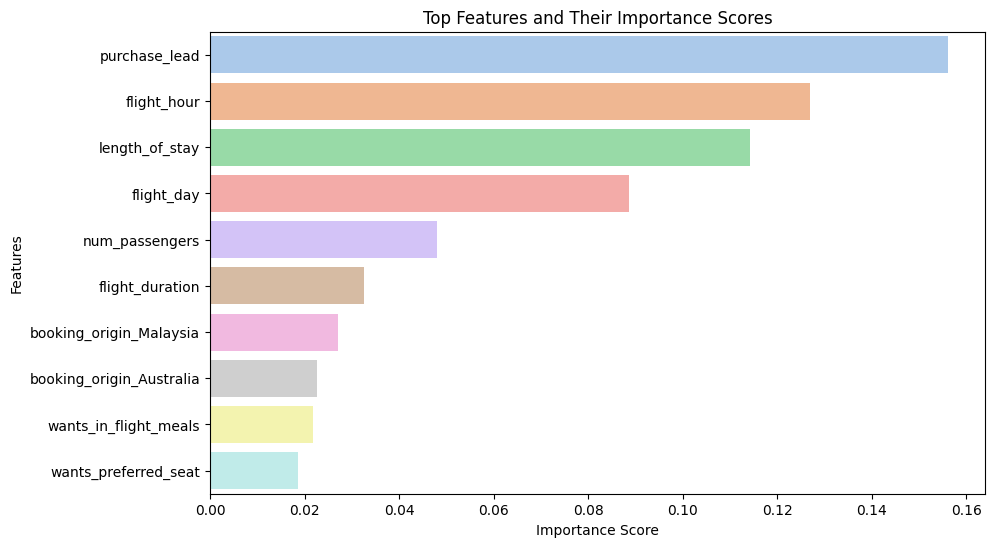

In [70]:
# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Pair features with importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort features based on importance scores in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top features and importance scores
top_features = [feature for feature, importance in sorted_features[:10]]
importance_scores = [importance for feature, importance in sorted_features[:10]]

# Set the pastel color palette
palette = sns.color_palette("pastel")

# Create a bar plot for top features and importance scores with the pastel palette
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores, y=top_features, palette=palette)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top Features and Their Importance Scores')
plt.show()